# Doublet Detection on 8k PBMCs from 10x Genomics

In [3]:
import numpy as np
import doubletdetection
import tarfile
import matplotlib.pyplot as plt

## Download Data from 10x

In [2]:
'''
!curl -O http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
tar = tarfile.open('pbmc8k_filtered_gene_bc_matrices.tar.gz')
tar.extractall()
tar.close()
'''

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35.8M  100 35.8M    0     0  32.2M      0  0:00:01  0:00:01 --:--:-- 32.2M


### Load Count Matrix

In [5]:
indir = '/Users/yuanzan/Desktop/doublets/filtered_gene_bc_matrices/GRCh38/'
#matrix_path = 'filtered_gene_bc_matrices/GRCh38/matrix.mtx'
#数据来源
#!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
matrix_path = indir + 'matrix.mtx'

raw_counts = doubletdetection.load_mtx(matrix_path)
# Remove columns with all 0s
zero_genes = (np.sum(raw_counts, axis=0) == 0).A.ravel()
raw_counts = raw_counts[:, ~zero_genes]

## Run Doublet Detection
## 依赖scanpy
Here we show-off the new backend implementation that uses `scanpy`. This new implementation is over 2x faster than version 2.4.0. To use the previous version of DoubletDetection please add the parameters (`use_phenograph=True`, `verbose=True`, `standard_scaling=False`) to the classifier and use the thresholds `p_thresh=1e-7`, `voter_thresh=0.8`. We recommend first using these parameters until we further validate the new implementation.

In [6]:
clf = doubletdetection.BoostClassifier(n_iters=50, use_phenograph=False, standard_scaling=True)
doublets = clf.fit(raw_counts).predict(p_thresh=1e-16, voter_thresh=0.5)

/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-pa

/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parall

/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parall

/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parall

## Visualize Results

### Convergence of doublet calls

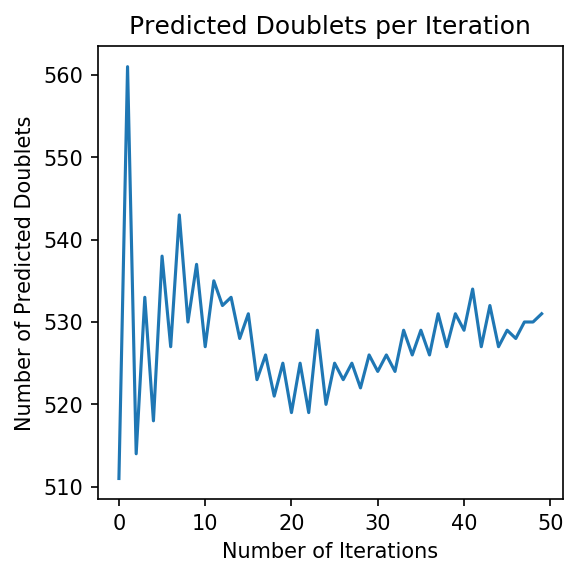

In [7]:
f = doubletdetection.plot.convergence(clf, save='convergence_test.pdf', show=True, p_thresh=1e-16, voter_thresh=0.5)

### Doublets on umap

/Users/yuanzan/anaconda3/lib/python3.6/site-packages/doubletdetection/plot.py:128: UserWarning: Sparse raw_counts is automatically densified.
  warnings.warn("Sparse raw_counts is automatically densified.")
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../anaconda3/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/yuanzan/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution

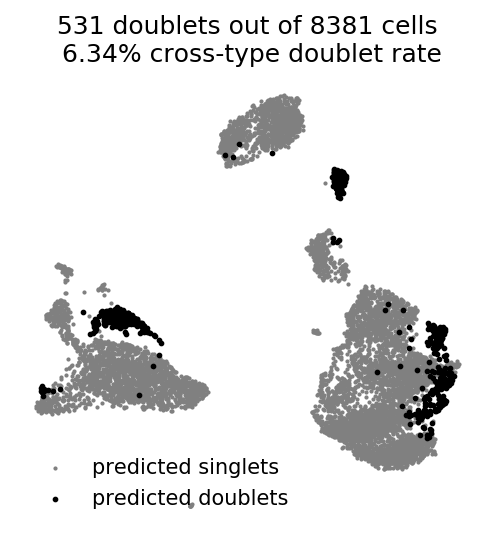

In [8]:
f2, umap_coords = doubletdetection.plot.umap_plot(raw_counts, doublets, random_state=1, 
                                                       save='umap_test.pdf', show=True)

### Number of predicted doublets at different threshold combinations

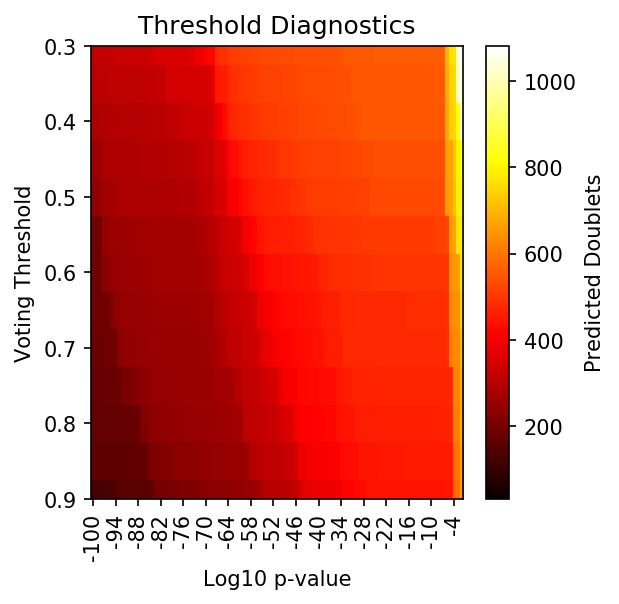

In [9]:
f3 = doubletdetection.plot.threshold(clf, save='threshold_test.pdf', show=True, p_step=6)

In [10]:
doublets

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
import pandas as pd
df = pd.read_csv('/Users/yuanzan/Desktop/doublets/scrublet_doublet.csv', header=0, index_col=None, names=['barcode','scrublet_doublet_scores','scrublet'])
df['doubletdetection'] = doublets
df.loc[df[df['doubletdetection']==0].index,'doubletdetection'] = False
df.loc[df[df['doubletdetection']==1].index,'doubletdetection'] = True
df['count'] = 1

In [46]:
df[['doubletdetection','scrublet','count']].groupby(['doubletdetection','scrublet']).sum()

count
doubletdetection scrublet       
False            False      7795
                 True         55
True             False       219
                 True        312

In [47]:
df.to_csv(indir + '/doubletdetection_vs_scrublet.txt', index=False,header=True)

In [48]:
df.head()

,barcode,scrublet_doublet_scores,scrublet,doubletdetection,count
0,AAACCTGAGCATCATC-1,0.020233,False,False,1
1,AAACCTGAGCTAACTC-1,0.009747,False,False,1
2,AAACCTGAGCTAGTGG-1,0.013493,False,False,1
3,AAACCTGCACATTAGC-1,0.087379,False,False,1
4,AAACCTGCACTGTTAG-1,0.024050,False,False,1


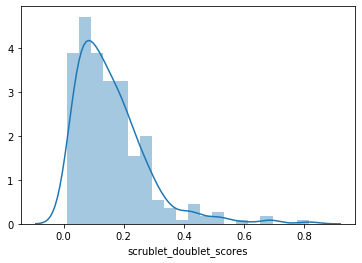

In [56]:
import seaborn as sns
df_diff = df[df['scrublet'] != df['doubletdetection']]
sns.distplot(df_diff.scrublet_doublet_scores)

#sns.distplot(df_diff[df_diff['scrublet']==True].scrublet_doublet_scores, color="g")
#sns.distplot(df_diff[df_diff['scrublet']==False].scrublet_doublet_scores, color="r")